# Wrangle Act File  

In [273]:
import pandas as pd 
import requests 
import tweepy 
from tweepy import OAuthHandler
import json
from matplotlib import pyplot as plt

## Gather

### Hand On File

In [2]:
# importing from file directly 
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Downloading using response library

In [38]:
###******** This Runs Once *********###
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

In [39]:
###******** This Runs Once *********###
with open('saved_work/image-predictions.tsv', 'wb') as file:
    file.write(response.content)


In [3]:
img_pred = pd.read_csv('saved_work/image-predictions.tsv', sep='\t')

### Downloading tweets data using tweepy

In [8]:
###******** This Runs Once *********###
# Getting The API keys 
keys_df = pd.read_csv("resources/tweepy.csv")

consumer_key = keys_df.loc[keys_df.name == 'key', 'value'].iloc[0]
consumer_secret = keys_df.loc[keys_df.name == 'secret-key', 'value'].iloc[0]
access_token = keys_df.loc[keys_df.name == 'access-token', 'value'].iloc[0]
access_secret = keys_df.loc[keys_df.name == 'access-secret', 'value'].iloc[0]

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [17]:
###******** This Runs Once *********###
# Getting Tweet data and saving it to tweet_json.txt
tweet_ids = tw_archive.tweet_id.values
fail_dict = {}

with open('saved_work/tweet_json.txt', 'w') as outfile:
    for id in tweet_ids:
        try: 
            tweet = api.get_status(id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            fail_dict[id] = e
            pass

print(fail_dict)

123072: TweepError("Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/show.json?id=680221482581123072&tweet_mode=extended (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fb9c664f048>: Failed to establish a new connection: [Errno -2] Name or service not known',))",), 680206703334408192: TweepError("Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/show.json?id=680206703334408192&tweet_mode=extended (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fb9c664f518>: Failed to establish a new connection: [Errno -2] Name or service not known',))",), 680191257256136705: TweepError("Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/show.json?id=680191257256136705&tweet_mode=extended (Caused by NewConnectionError('<ur

In [24]:
###******** This Runs Once *********###
# Redownload failed tweets
old_tweet_ids = list(fail_dict.keys())
fail_dict = {}

with open('saved_work/tweet_json.txt', 'a+') as outfile:
    for id in old_tweet_ids:
        try: 
            tweet = api.get_status(id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            fail_dict[id] = e
            pass

print(fail_dict)

{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 844704788403113984: TweepError([{'code': 144, 'message': 'N

In [4]:
tw_api = pd.read_json('saved_work/tweet_json.txt',lines=True)

## Assess

### Twitter Archive

In [5]:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
tw_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Millie        1
Pinot         1
Sunshine      1
Harry         1
Miguel        1
Name: name, Length: 957, dtype: int64

In [8]:
tw_archive.loc[tw_archive.name == 'a', 'text']

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

In [246]:
tw_archive.loc[tw_archive.name == 'None', 'text']

5       Here we have a majestic great white breaching ...
7       When you watch your owner call another dog a g...
12      Here's a puppo that seems to be on the fence a...
24      You may not have known you needed to see this ...
25      This... is a Jubilant Antarctic House Bear. We...
                              ...                        
2342    Here we have a well-established sunblockerspan...
2343    Let's hope this flight isn't Malaysian (lol). ...
2344    Here we have a northern speckled Rhododendron....
2351    Here we have a 1949 1st generation vulpix. Enj...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 745, dtype: object

In [248]:
tw_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Image Predictions

In [10]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
img_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
conch                   1
clog                    1
beaver                  1
military_uniform        1
walking_stick           1
Name: p1, Length: 378, dtype: int64

### Quality Issues

- `tw_archive` mistaken 'a' as dog name. 
- `tw_archive` mistaken missing names for 'None' as string
- `tw_archive` Keep original tweets only.
- `tw_archive` extra unwanted data columns i.e. (retweeted_status_user_id, retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id)
- some tweets are missing favourite_count and retweet_count
- `tw_archive` datatype issues i.e. (tweet_id, favourite_count, retweet_count)
- `tw_archive` datatype issues i.e. (timestamp)
- `tw_archive` datatype issues i.e. caegorized dog_stages
- `tw_archive` rating fraction missing to compare dogs
- `img_pred` datatype issues with (tweet_id)
- `img_pred` some tweets have no images in prediction.

### Tidiness Issues
- `tw_archive` dog stages into 4 columns. 
- `tw_archive`, `tw_api` have data related to each other.
- get both data frames on the same table to ease visualization

## Cleaning

In [224]:
tw_archive_clean = tw_archive.copy()
img_pred_clean = img_pred.copy()
tw_api_clean = tw_api.copy()

- `tw_archive` mistaken 'a' as dog name. 

### Completeness
#### Define:
- extraxt the name of dog from tweet `text` using regex and assign it to dog name

#### Code

In [225]:
tw_archive_clean.name[tw_archive_clean.name=='a'] = tw_archive_clean[tw_archive_clean.name=='a'].text.str.extract(r'.*named\s([A-Z][a-z]+).*')[0]

#### Test

In [226]:
tw_archive_clean.name.value_counts()

None       745
Charlie     12
Cooper      11
Lucy        11
Oliver      11
          ... 
Darrel       1
Gilbert      1
Scott        1
Lugan        1
Pete         1
Name: name, Length: 972, dtype: int64

- `tw_archive` mistaken missing names for 'None' as string

#### Define:
- extraxt the name of dog from tweet `text` using regex and assign it to dog name

#### Code

In [227]:
tw_archive_clean.name[tw_archive_clean.name=='None'] = tw_archive_clean[tw_archive_clean.name=='None'].text.str.extract(r'.*named\s([A-Z][a-z]+).*')[0]

#### Test

In [228]:
tw_archive_clean.name.value_counts()

Charlie    12
Lucy       11
Cooper     11
Oliver     11
Penny      10
           ..
Darrel      1
Gilbert     1
Scott       1
Lugan       1
Pete        1
Name: name, Length: 973, dtype: int64

- `tw_archive` Keep original tweets only.

#### Define
- Remove retweets and replies using their non null value in their columns.

#### Code

In [229]:
tw_archive_clean = tw_archive_clean[tw_archive_clean['in_reply_to_status_id'].isnull() & tw_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [230]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        1461 non-null   object 
 13  doggo                       2097 

- `tw_archive` extra unwanted data columns i.e. (retweeted_status_user_id, retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id)


#### Define
- remove extra columns using drop method.

#### Code

In [231]:
tw_archive_clean = tw_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [232]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1461 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Tidiness

- `tw_archive`, `tw_api` have data related to each other.

#### Define
- *merge both dataframes*: Extract the wanted data from tw_api. Then rename the tweet_id and compare to make sure it's the same tweet ids. after that merge the extracted data with tw_archive_clean 

#### Code

In [233]:
tw_api_clean = tw_api_clean.rename(columns={'id':'tweet_id'})

# Check whether the id is of the tweet or something else to not confuse with id_str
avail = []
for i in range(len(tw_api_clean.tweet_id.values)):
    avail.append(tw_api_clean.tweet_id.values[i] in tw_archive_clean.tweet_id.values)
print(sum(avail))

tw_archive_clean = pd.merge(tw_archive_clean, tw_api_clean[['tweet_id','favorite_count','retweet_count']], on="tweet_id", how='left')

2090


#### Test

In [234]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                1461 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
 12  favorite_count      2090 non-null   float64
 13  retweet_count       2090 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 245.7+ KB


- `tw_archive` dog stages into 4 columns. 

#### Define
- merge these 4 columns into 1 column that have these all

#### Code

In [236]:
df = pd.melt(tw_archive_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'retweet_count', 'favorite_count'], var_name='dog_stage', value_name='to_drop')
df = df[df.to_drop!='None']

for n, id in enumerate(tw_archive_clean.tweet_id.values):
    if id in df.tweet_id.values:
        tw_archive_clean.loc[n, 'dog_stage'] = df.loc[df.tweet_id==id, "to_drop"].iloc[0]
    else:
        tw_archive_clean.loc[n, 'dog_stage'] = ""

tw_archive_clean = tw_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [237]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                1461 non-null   object 
 8   favorite_count      2090 non-null   float64
 9   retweet_count       2090 non-null   float64
 10  dog_stage           345 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 276.6+ KB


### Quality

- some tweets are missing favourite_count and retweet_count with 0

#### Define
- replace the unavailable tweet counts with mean count value as they are few.

#### Code

In [238]:
tw_archive_clean.favorite_count = tw_archive_clean.favorite_count.fillna(tw_archive_clean.favorite_count.mean())
tw_archive_clean.retweet_count = tw_archive_clean.retweet_count.fillna(tw_archive_clean.retweet_count.mean())

#### Test

In [239]:
tw_archive_clean.favorite_count.value_counts()

8251.711962     7
6233.000000     4
774.000000      3
2178.000000     3
1859.000000     3
               ..
2702.000000     1
12545.000000    1
1363.000000     1
4372.000000     1
15872.000000    1
Name: favorite_count, Length: 1913, dtype: int64

- `tw_archive` datatype issues i.e. (tweet_id, favourite_count, retweet_count)

#### Define 
- convert dataTypes using astype method

#### Code

In [240]:
tw_archive_clean.tweet_id = tw_archive_clean.tweet_id.astype(str)
tw_archive_clean.favorite_count = tw_archive_clean.favorite_count.astype(int)
tw_archive_clean.retweet_count = tw_archive_clean.retweet_count.astype(int)

#### Test

In [241]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1461 non-null   object
 8   favorite_count      2097 non-null   int64 
 9   retweet_count       2097 non-null   int64 
 10  dog_stage           345 non-null    object
dtypes: int64(4), object(7)
memory usage: 276.6+ KB


- `tw_archive` datatype issues i.e. (timestamp)

#### Define
- convert to datetime using `to_datetime` method

#### Code

In [242]:
tw_archive_clean.timestamp = pd.to_datetime(tw_archive_clean.timestamp)

#### Test

In [243]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1461 non-null   object             
 8   favorite_count      2097 non-null   int64              
 9   retweet_count       2097 non-null   int64              
 10  dog_stage           345 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 276.6+ KB


- `tw_archive` datatype issues i.e. caegorized dog_stages

#### Define
- convert to category datatype

#### Code

In [244]:
tw_archive_clean.dog_stage = tw_archive_clean.dog_stage.astype('category')

#### Test

In [245]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1461 non-null   object             
 8   favorite_count      2097 non-null   int64              
 9   retweet_count       2097 non-null   int64              
 10  dog_stage           345 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 262.5+ KB


- `tw_archive` rating fraction missing to compare dogs

#### Define
calculate rating fraction using numertor and denominator

#### Code

In [253]:
tw_archive_clean['rating_fraction'] = tw_archive_clean.rating_numerator / tw_archive_clean.rating_denominator

#### Test

In [256]:
tw_archive_clean.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,rating_fraction
count,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000
mean,12.189318,10.448736,8251.709585,2482.440153,1.169281
std,40.364996,6.645061,11976.980350,4338.437370,3.965932
min,0.000000,2.000000,70.000000,11.000000,0.000000
25%,10.000000,10.000000,1838.000000,552.000000,1.000000
50%,11.000000,10.000000,3781.000000,1207.000000,1.100000
75%,12.000000,10.000000,10256.000000,2819.000000,1.200000
max,1776.000000,170.000000,154205.000000,76464.000000,177.600000


- `img_pred` datatype issues with (tweet_id)

#### Define
- change data type to string. 

#### Code

In [258]:
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype(str)

#### Test

In [259]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


- `img_pred` some tweets have no images in prediction.

#### Define
- merge both dataframes and get only tweets with image prediction

#### Code

In [261]:
tw_archive_master = pd.merge(img_pred_clean, tw_archive_clean, on="tweet_id", how='left')

#### Test

In [262]:
tw_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   object             
 1   jpg_url             2075 non-null   object             
 2   img_num             2075 non-null   int64              
 3   p1                  2075 non-null   object             
 4   p1_conf             2075 non-null   float64            
 5   p1_dog              2075 non-null   bool               
 6   p2                  2075 non-null   object             
 7   p2_conf             2075 non-null   float64            
 8   p2_dog              2075 non-null   bool               
 9   p3                  2075 non-null   object             
 10  p3_conf             2075 non-null   float64            
 11  p3_dog              2075 non-null   bool               
 12  timestamp           1971 non-null 

## Storing Data

In [264]:
# This runs once after cleaning
tw_archive_master.to_csv('saved_work/twitter_archive_master.csv')

## Analyzing and Visulaizing 

In [267]:
df = tw_archive_master

### What is the highest rated dog stage ?

dog_stage
doggo      1.179452
floofer    1.200000
pupper     1.071642
puppo      1.200000
Name: rating_fraction, dtype: float64

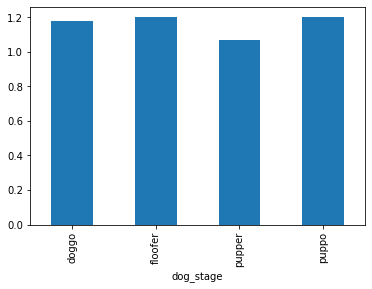

In [291]:
df.groupby('dog_stage')['rating_fraction'].mean()[1:].plot(kind='bar');
df.groupby('dog_stage')['rating_fraction'].mean()[1:]

The highest rated dog stages are both floofer and puppo. 

### What is the most favorited dog stage?

dog_stage
doggo      18217.465753
floofer    11906.000000
pupper      6636.631841
puppo      20712.227273
Name: favorite_count, dtype: float64

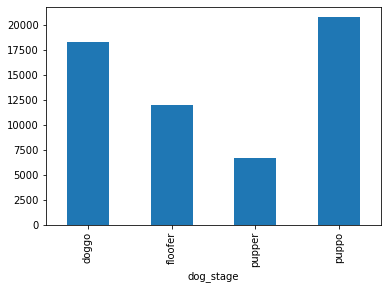

In [292]:
df.groupby('dog_stage')['favorite_count'].mean()[1:].plot(kind='bar');
df.groupby('dog_stage')['favorite_count'].mean()[1:]

Puppo dogs are the most favorited ones by followers

### Is the most favorited dog stage, the most retweeted also ?

dog_stage
doggo      6205.109589
floofer    4286.000000
pupper     2074.865672
puppo      5733.136364
Name: retweet_count, dtype: float64

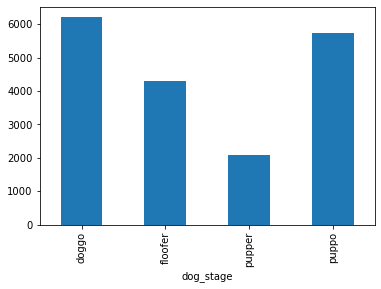

In [293]:
df.groupby('dog_stage')['retweet_count'].mean()[1:].plot(kind='bar');
df.groupby('dog_stage')['retweet_count'].mean()[1:]

The most retweeted dog stage tweets are th doggo ones.

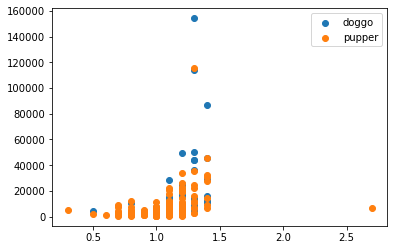

In [302]:
stages = ['doggo', 'pupper']

for n, stage in enumerate(stages):
    df_stage = df[df.dog_stage==stage]
    plt.scatter(df_stage['rating_fraction'], df_stage['favorite_count'], label=stage);
plt.legend()

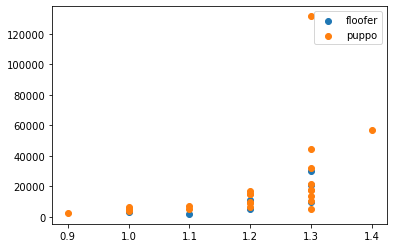

In [303]:
stages = ['floofer', 'puppo']

for n, stage in enumerate(stages):
    df_stage = df[df.dog_stage==stage]
    plt.scatter(df_stage['rating_fraction'], df_stage['favorite_count'], label=stage);
plt.legend()